In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [58]:
rewards = {0: {0: 1, 1: -1, 2: 2},
           1: {0: 8, 1: -8},
           2: {0: 0, 1: 4}
           }
def get_action(state, trial, policy):
    value = np.random.uniform(0, 1)
    if state == 0:
        if value <= policy[state][trial, 0]:
            return 0, True
        elif value <= (policy[state][trial, 0] + policy[state][trial, 1]):
            return 1, False
        else:
            return 2, True
    else:
        return (0, True) if value <= policy[state][trial, 0] else (1, True)

def simulation(lr_a, lr, beta, n_trials, rewards):
    V = np.zeros((n_trials, len(rewards)))
    policy = {i: np.zeros((n_trials, len(rewards[i]))) for i in range(len(rewards))}
    actions = {i: np.zeros((n_trials, len(rewards[i]))) for i in range(len(rewards))}

    for state in range(len(rewards)):
        policy[state][0] = np.exp(actions[state][0]) / np.sum(np.exp(actions[state][0]))

    for trial in range(1, n_trials):
        for state in range(len(rewards)):
            actions[state][trial] = actions[state][trial-1]
            policy[state][trial] = policy[state][trial-1]
            V[trial] = V[trial-1]

        state = 0
        terminal = False
        while not terminal:
            action, terminal = get_action(state, trial, policy)
            state_new = 1 if np.random.uniform(0, 1) < 0.5 else 2
            g = 0 if terminal else V[trial, state_new]
            delta = rewards[state][action] + g - V[trial, state]
            actions[state][trial, action] += lr_a * delta
            policy[state][trial] = np.exp(actions[state][trial]) * beta / np.sum(np.exp(actions[state][trial]))
            V[trial, state] += lr * delta
            state = state_new
    return V, policy


In [59]:
n_runs = 1000
V_all = []
policy_all = {0:[], 1:[], 2:[]}
n_trials = 1000


for r in tqdm(range(n_runs)):
    V, policy = simulation(0.0, 0.2, 1, n_trials, rewards)
    V_all.append(V)
    
    for state in policy:
        policy_all[state].append(policy[state])
    
V_all = np.asarray(V_all)
for state in policy_all:
        policy_all[state] = np.mean(np.asarray(policy_all[state]), axis=0)


100%|██████████| 1000/1000 [00:10<00:00, 92.91it/s]


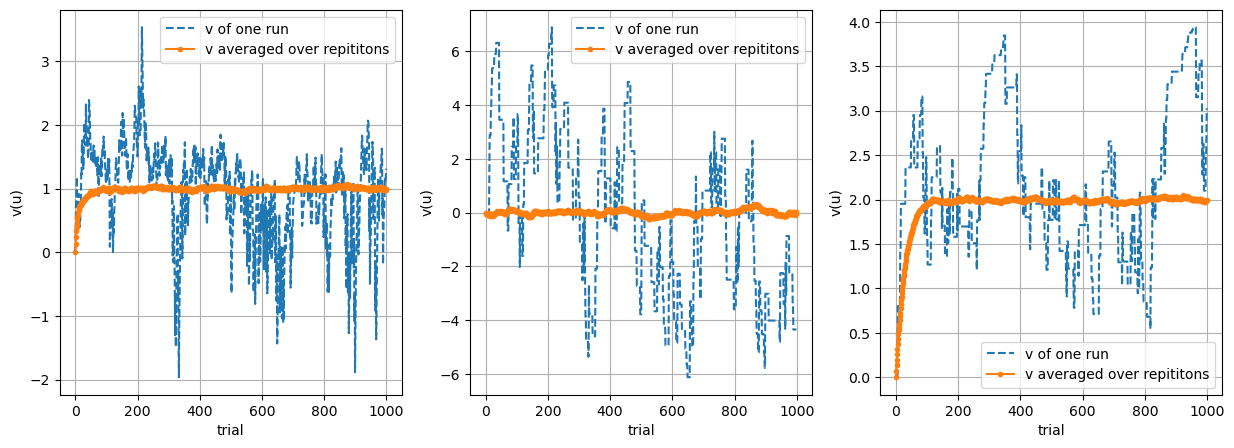

In [60]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for idx, ax in enumerate(axs):
    ax.plot([V_all[1][i, idx] for i in range(n_trials)], '--', label = "v of one run")
    ax.plot(np.mean(V_all, axis=0)[:, idx], '.-', label="v averaged over repititons")
    ax.set_ylabel("v(u)")
    ax.set_xlabel("trial")
    ax.legend()
    ax.grid()

In [61]:
V_all = []
policy_all = {0:[], 1:[], 2:[]}

for r in tqdm(range(n_runs)):
    V, policy = simulation(0.075, 0.2, 1, n_trials, rewards)
    V_all.append(V)
    
    for state in policy:
        policy_all[state].append(policy[state])
    
V_all = np.asarray(V_all)
for state in policy_all:
    policy_all[state] = np.mean(np.asarray(policy_all[state]), axis=0)

100%|██████████| 1000/1000 [00:11<00:00, 89.68it/s]


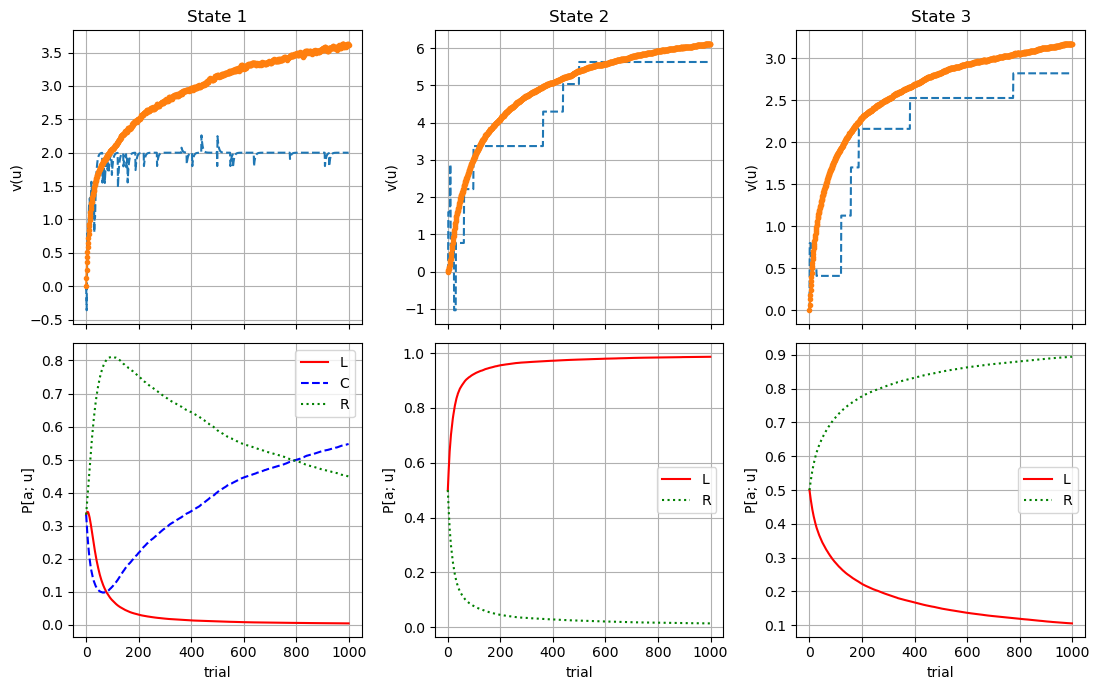

In [62]:
flag = False
fig, axs = plt.subplots(2, 3, figsize=(11, 7), sharex = True)
for idx, ax in enumerate(axs[0]):
    ax.plot([V_all[1][i, idx] for i in range(n_trials)], '--', label="v of one run")
    ax.plot(np.mean(V_all, axis=0)[:, idx], '.-', label="v averaged over repetitions")
    ax.set_ylabel("v(u)")
    ax.set_title(f"State {idx+1}")
    #ax.legend()
    ax.grid()
for idx, ax in enumerate(axs[1]):
    ax.grid()
    ax.set_ylabel('P[a; u]')
    linestyles = ['-', '--', ':']
    actions_text = ['L', 'C', 'R']
    colors = ['red', 'blue', 'green']
    for action in range(policy_all[idx].shape[1]):
        if flag:
            linestyles = ['-', ':']
            actions_text = ['L', 'R']
            colors = ['red', 'green']
            ax.plot(policy_all[idx][:, action], linestyles[action], label=actions_text[action], c = colors[action])
        else:
            ax.plot(policy_all[idx][:, action], linestyles[action], label=actions_text[action], c= colors[action])
        ax.legend()
    flag = True
    ax.set_xlabel("trial")

plt.tight_layout()
plt.show()


In [63]:
rewards = {0: {0: 0, 1: 0},
           1: {0: 2, 1: 3},
           2: {0: 0, 1: 4}
           }
def get_action(state, t, policy):
    value = np.random.uniform(0, 1)
    if state == 0: 
        if value <= policy[state][t, 0]:
            return 0, False
        else: 
            return 1, False
    else: 
        if value <= policy[state][t, 0]:
            return 0, True
        else: 
            return 1, True

def simulation(lr_a, lr, beta, n_trials, rewards):
    V = np.zeros((n_trials, len(rewards)))
    policy = {i: np.zeros((n_trials, len(rewards[i]))) for i in range(len(rewards))}
    actions = {i: np.zeros((n_trials, len(rewards[i]))) for i in range(len(rewards))}

    for state in range(len(rewards)):
        policy[state][0] = np.exp(actions[state][0]) / np.sum(np.exp(actions[state][0]))

    for trial in range(1, n_trials):
        for state in range(len(rewards)):
            actions[state][trial] = actions[state][trial-1]
            policy[state][trial] = policy[state][trial-1]
            V[trial] = V[trial-1]

        state = 0
        terminal = False
        ihu = 0
        while not terminal:
            action, terminal = get_action(state, trial, policy)
            if action == 0: 
                state_new = 1 
            else: 
                state_new = 2
            g = 0 if terminal else V[trial, state_new]
            delta = rewards[state][action] + g - V[trial, state]
            actions[state][trial, action] += lr_a * delta
            policy[state][trial] = np.exp(actions[state][trial]) * beta / np.sum(np.exp(actions[state][trial]))
            V[trial, state] += lr * delta
            state = state_new
    return V, policy


In [64]:
V_all = []
policy_all = {0:[], 1:[], 2:[]}

for r in tqdm(range(n_runs)):
    V, policy = simulation(0.075, 0.2, 1, n_trials, rewards)
    V_all.append(V)
    
    for state in policy:
        policy_all[state].append(policy[state])
    
V_all = np.asarray(V_all)
for state in policy_all:
    policy_all[state] = np.mean(np.asarray(policy_all[state]), axis=0)

100%|██████████| 1000/1000 [00:12<00:00, 81.79it/s]


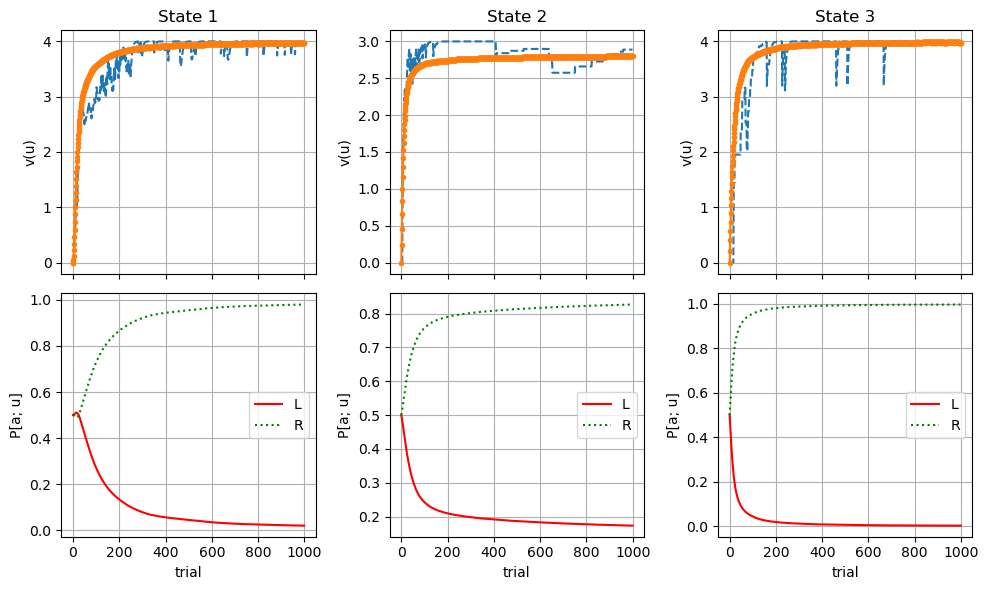

In [65]:
flag = False
fig, axs = plt.subplots(2, 3, figsize=(10, 6), sharex = True)
for idx, ax in enumerate(axs[0]):
    ax.plot([V_all[1][i, idx] for i in range(n_trials)], '--', label="v of one run")
    ax.plot(np.mean(V_all, axis=0)[:, idx], '.-', label="v averaged over repetitions")
    ax.set_ylabel("v(u)")
    ax.set_title(f"State {idx+1}")
    #ax.legend()
    ax.grid()
for idx, ax in enumerate(axs[1]):
    ax.grid()
    ax.set_ylabel('P[a; u]')
    linestyles = ['-', ':']
    actions_text = ['L', 'R']
    colors = ['red', 'green']
    for action in range(policy_all[idx].shape[1]):
        ax.plot(policy_all[idx][:, action], linestyles[action], label=actions_text[action], c = colors[action])
        ax.legend()
    flag = True
    ax.set_xlabel("trial")

plt.tight_layout()
plt.show()